In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from plotly.subplots import make_subplots
import pickle
import plotly.graph_objects as go
import plotly.express as px

import charset_normalizer
import fuzzywuzzy
from fuzzywuzzy import process
import os
import re
from dateutil import parser

import warnings

warnings.filterwarnings("ignore")
plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle"
)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Character encoding


In [2]:
df_name = []
encoding = []
path = []

dataset_folder = "test"
for file in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, file)
    path.append(file_path)
    # look at the first ten thousand bytes to guess the character encoding
    with open(file_path, "rb") as rawdata:
        result = charset_normalizer.detect(rawdata.read())
        encoding.append(result["encoding"])
    # check what the character encoding might be
    file_name = os.path.splitext(file)[0]
    df_name.append(file_name)
    print(f"{file_name}: {result}")

context: {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}
mobile_plan_attr: {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}
mobile_plan_user: {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}
user: {'encoding': 'utf-8', 'language': 'Spanish', 'confidence': 1.0}


In [3]:
data_source = (tuple(df_name), tuple(encoding), tuple(path))

In [4]:
context = pd.read_csv(data_source[2][0], encoding=data_source[1][0])
context.sample(5)

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,direction
781,9629,Travel,Al~o&ne,Sun&?ny,14:00,1,1,0,0,1,0,0
974,6544,Visit,?Al&one,&%?R~ainy,18:00,1,1,1,0,1,27,0
1069,9428,Travel,Alone,Su&nny,10 AM,1,0,0,0,1,0,0
333,9519,Visit,A??lone,Su!!~nny,3 PM,1,1,1,0,1,0,0
235,15348,Travel,Famil~y,S!u?nny,5 PM,1,0,0,0,1,0,0


In [5]:
mobile_plan_attr = pd.read_csv(
    data_source[2][1], encoding=data_source[1][1], delimiter=";"
)

mobile_plan_attr.sample(5)

,mobile_plan,description,price,duration
0,DATASILVER,"2GB/ day, high speed",100000,5d
4,DATACALL,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
2,SOCIALMEDIA,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3d
1,DATAGOLD,"5GB/ day, high speed",200000,5d
3,SOCIALMEDIAGOLD,"3GB/ day, high speed\nUnlimited for Tik Tok, F...",250000,3d


In [6]:
mobile_plan_user = pd.read_csv(data_source[2][2], encoding=data_source[1][2])
mobile_plan_user.sample(5)

,id,coupon_id,accept
1063,5700.0,SOCIALMEDIAGOLD,0.0
1119,2482.0,DATASILVER,1.0
967,6856.0,DATAGOLD,0.0
113,8434.0,SOCIALMEDIAGOLD,0.0
365,17884.0,DATAGOLD,1.0


In [7]:
user = pd.read_csv(data_source[2][3], encoding=data_source[1][3])
user.sample(5)

,id,name,gender,age,education,profession,income,living_with,nation,phone,job,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB
406,19673,이지혜,Female,47,Bachelor,Construction & Extraction,342500000 VND,M a r ried_0,KOREA,016-878-9687,유리제조 및 가공기 조작원,1,7,8,2,1
1059,16176,Stella Novais,Female,45,NaN,Arts Design Entertainment Sports & Media,2200000000 VND,M arried_0,BRAZIL,61 1020 9402,Aeromoça,2,2,8,6,1
1065,16429,Adolfine Mangold B.Sc.,Female,68,Highschool,Sales & Related,40900$,Marr ied_2,DENMARK,00539 951075,Winzer,0,22,8,1,1
396,9066,서은경,Female,51,NaN,Education&Training&Library,1305000000 VND,M arried_1,KOREA,061-326-9844,기타 여가 및 스포츠 관련 종사원,0,0,6,3,1
668,8396,Srta. Gabriela Melo,Female,39,Masters,Student,365000000 VND,Di vorced_1,BRAZIL,0300-271-3569,Perfusionista,0,22,22,17,2


In [8]:
dataset = [context, mobile_plan_attr, mobile_plan_user, user]

# Cleaning

## Missing values check


In [9]:
for x in dataset:
  print('-----------------')
  print(x.isna().sum())

-----------------
id              0
purpose         0
go_with         0
weather         0
time            0
viettel_no_0    0
viettel_no_1    0
viettel_no_2    0
to_hanoi        0
to_other        0
score           0
direction       0
dtype: int64
-----------------
mobile_plan    0
description    0
price          0
duration       0
dtype: int64
-----------------
id            0
coupon_id    87
accept       92
dtype: int64
-----------------
id                     0
name                   0
gender                 0
age                    0
education            348
profession             0
income                 0
living_with            0
nation                 0
phone                  0
job                    0
fb_freq                0
yt_freq                0
insta_freq             0
use_less_than_2GB      0
use_2GB_to_4GB         0
dtype: int64


In [10]:
mobile_plan_user = mobile_plan_user.dropna(subset=['coupon_id', 'accept'])

## Duplicate


In [11]:
user['id'].duplicated().sum()

0

In [12]:
context['id'].duplicated().sum()

0

In [13]:
mobile_plan_user['id'].duplicated().sum()

130

In [14]:
mobile_plan_user[mobile_plan_user['id'].duplicated()].sort_values(by='id')

,id,coupon_id,accept
1155,1064.0,DATASILVER,0.0
1121,1331.0,SOCIALMEDIA,1.0
1120,1331.0,SOCIALMEDIA,1.0
1310,1625.0,SOCIALMEDIA,0.0
1332,1733.0,DATASILVER,0.0
...,...,...,...
1244,18459.0,DATACALL,1.0
1140,18936.0,SOCIALMEDIA,1.0
1275,19317.0,SOCIALMEDIAGOLD,0.0
1135,19696.0,SOCIALMEDIAGOLD,1.0


## Context


In [15]:
context.sample(5)

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,direction
680,4983,Travel,Fri?end&(s),!!~%Sunny,12:00,1,1,0,0,1,0,0
48,18547,Work,Alo%ne,~~!~Sunny,6AM,1,1,1,0,1,0,0
946,12734,Travel,F&riend?(s),Snowy,9PM,1,1,0,0,1,0,0
863,3228,Travel,Friend(s),Rainy,22:00,1,1,0,0,1,34,0
1022,18255,Visit,Fa&&mily,Su~nny,20:00,1,1,0,0,1,1,0


In [16]:
for x in ["go_with", "weather"]:
    # Eliminate special characters and white spaces
    context[x] = context[x].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x))

    # Lowercase all words
    context[x] = context[x].str.lower()

    print(context[x].unique())

['alone' 'friends' 'family' ' family' ' f amily' 'fami ly' 'frie nds'
 ' alone' 'al one' 'fam ily' 'a lone' 'f riends' ' friends' 'frien ds'
 'fa mily' 'friend s' 'alo ne' '  family' 'f amily' 'fr iends' 'fri e nds'
 'famil y' ' a lone' ' f riends' 'alon e' 'fri ends' '  alone'
 'frie   nds' 'a  lone' 'f r iends' 'al  one' 'al   one' 'frie n ds'
 'a   lone' 'f a mily' ' al one' 'fam  ily' 'fa  mily' ' friend s'
 ' fam ily' 'frien d s' 'friends ' 'f  riends' 'f r ien ds' ' fa mily'
 'fr ie nds' '  a lone' ' alo ne' 'friend  s' 'fr i ends' 'f rien ds'
 ' fami ly']
['sunny' 'rainy' 'snowy']


In [17]:
# List of possible values for the column 'go_with'
choices = ["alone", "friend(s)", "family"]


# Apply the fuzzy matching to the column 'go_with'
def correct_name(name):
    return process.extractOne(name, choices)[0]


context["go_with"] = context["go_with"].apply(correct_name)

In [18]:
# Eliminate white spaces
context["time"] = context["time"].str.replace(r"\s+", "", regex=True)


# Function to convert time to 24-hour format
def convert_to_24hr_format(time_str):
    # Use dateutil.parser to parse the time string
    return parser.parse(time_str).strftime("%H:%M")


# Apply the function to the column 'time'
context["time"] = context["time"].apply(convert_to_24hr_format)
context["time"] = pd.to_datetime(context["time"], format="%H:%M")

In [19]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

context['hour'] = pd.to_datetime(context['time']).dt.hour
context['time_of_day'] = context['hour'].apply(time_of_day)

context = context.drop(columns=['time', 'hour'])

In [20]:
context["purpose"] = context["purpose"].str.strip()
context["purpose"] = context["purpose"].str.lower()

In [21]:
context.purpose.unique()

array(['travel', 'visit', 'work'], dtype=object)

In [22]:
context["purpose"] = context["purpose"].replace('travel', 'visit')

In [23]:
context = context.drop(axis=1, columns=["to_hanoi", "to_other"])

In [24]:
context.sample(5)

,id,purpose,go_with,weather,viettel_no_0,viettel_no_1,viettel_no_2,score,direction,time_of_day
796,11983,visit,alone,sunny,1,1,1,0,0,night
621,1930,visit,alone,sunny,1,0,0,0,1,afternoon
371,7033,visit,friend(s),sunny,1,1,0,0,0,afternoon
137,14936,visit,friend(s),sunny,1,0,0,22,0,afternoon
147,10917,work,alone,sunny,1,0,0,0,0,morning


## User


In [25]:
user.sample(5)

,id,name,gender,age,education,profession,income,living_with,nation,phone,job,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB
183,1152,Renee Perkins,Female,32,NaN,Computer & Mathematical,378000$,M ar r ied_0,AUSTRALIA,08.7569.0341,Media buyer,0,1,2,15,0
619,3141,Elsbeth Loos MBA.,Female,38,Bachelor,Unemployed,93000$,Ma rr ied_2,DENMARK,+49(0)4330903170,Mechaniker,0,3,1,0,0
1006,12495,Jaqueline Weimer B.Sc.,Female,33,Masters,Student,28000$,Unmar ried_0,DENMARK,(04407) 096798,Polizist,2,1,3,2,0
772,10014,Mary Dunn DDS,Female,63,Masters,Education&Training&Library,620000000 VND,Sing le_0,AUSTRALIA,3546 9159,Recycling officer,0,0,4,4,0
230,1745,Mary Hodges,Female,67,NaN,Unemployed,27800$,M arried_0,AUSTRALIA,08 5577 3724,Waste management officer,0,0,3,7,0


In [26]:
# Eliminate white spaces
user["living_with"] = user["living_with"].str.strip()
user["living_with"] = user["living_with"].str.replace(r"\s+", "", regex=True)
user["living_with"] = user["living_with"].str.lower()

In [27]:
user["nation"] = user["nation"].str.strip()
user["nation"] = user["nation"].str.lower()

In [28]:
user["gender"] = user["gender"].str.strip()
user["gender"] = user["gender"].str.lower()

In [29]:
user["education"] = user["education"].str.strip()
user["education"] = user["education"].str.lower()

In [30]:
user.nation.unique()

array(['korea', 'australia', 'brazil', 'denmark'], dtype=object)

In [31]:
user["nation"] = user["nation"].replace("australia", "oceania")
user["nation"] = user["nation"].replace(["brazil", "us"], "americas")
user["nation"] = user["nation"].replace(["denmark", "england", "russia"], "europe")
user["nation"] = user["nation"].replace(["korea", "japan", "china"], "asia")

In [32]:
user = user.rename(columns={"nation": "continent"})

In [33]:
currency_exchange_rate = 23000

# Function to clean and adjust income values
def clean_income(value):
    if 'VND' in value:
        return int(value.replace('VND', '')) / currency_exchange_rate
    elif '$' in value:
        return int(value.replace('$', ''))
    else:
        return int(value)

# Apply the function to the 'income' column
user['income_1'] = user['income'].apply(clean_income)

In [34]:
user['profession'] = user['profession'].str.lower()

In [35]:
user['profession'] = user['profession'].apply(lambda x: "jobs" if x not in ['student', 'retired', 'unemployed'] else x)

In [36]:
user["education"] = user["education"].fillna("unknown")
user["education"] = user["education"].replace("bachelor", "grad")
user["education"] = user["education"].replace(["associate", "highschool"], "undergrad")
user["education"] = user["education"].replace("masters", "postgrad")

In [37]:
user.living_with.unique()

array(['married_1', 'married_3', 'married_4', 'married_2', 'divorced_2',
       'divorced_1', 'single_0', 'single_3', 'single_1', 'married_0',
       'unmarried_0', 'unmarried_1', 'divorced_3', 'single_4',
       'widowed_2', 'widowed_3', 'unmarried_2', 'single_2', 'divorced_4',
       'unmarried_4', 'unmarried_3', 'divorced_0', 'widowed_1',
       'widowed_4'], dtype=object)

In [38]:
# Seperate Living_With column into Maritual_Status column and Children column
user[["marital_status", "children"]] = user["living_with"].str.split("_", expand=True)


user["marital_status"] = user["marital_status"].apply(
    lambda x: "relationship" if x == "married" else "single"
)

In [39]:
user['income_level'] = user['income_1'].apply(lambda x: 'lower' if x <= 30000 else 'lower-middle' if x > 30000 and x <= 58000 else 'middle' if x > 58000 and x <= 94000 else 'upper-middle' if x > 94000 and x <= 153000 else 'upper')

In [40]:
user

,id,name,gender,age,education,profession,income,living_with,continent,phone,job,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB,income_1,marital_status,children,income_level
0,7067,김은주,female,33,postgrad,unemployed,1607500000 VND,married_1,asia,053-265-1191,점토제품 생산기 조작원,0,1,3,0,1,69891.304348,relationship,1,middle
1,2114,김지연,female,34,postgrad,unemployed,1600000000 VND,married_1,asia,051-368-9724,기타 운송장비 정비원,0,1,1,1,1,69565.217391,relationship,1,middle
2,6582,Sharon Rodriguez,female,34,postgrad,unemployed,67800$,married_3,oceania,+61-3-2132-2965,Actor,0,1,3,1,0,67800.000000,relationship,3,middle
3,11379,Mariah Peixoto,female,34,postgrad,unemployed,1792500000 VND,married_4,americas,(071) 6038 8054,Terapeuta ocupacional,0,1,3,0,0,77934.782609,relationship,4,middle
4,3986,김서영,female,34,postgrad,unemployed,1657500000 VND,married_1,asia,054-274-1759,제품 생산관련 관리자,0,1,1,0,1,72065.217391,relationship,1,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,19084,박서윤,female,37,grad,jobs,1047500000 VND,married_1,asia,010-9131-7720,기타 배달원,0,15,2,1,2,45543.478261,relationship,1,lower-middle
1108,18221,Theodora Metz-Stolze,female,40,grad,jobs,960000000 VND,married_2,europe,+49(0) 459976230,Winzer,0,21,3,2,1,41739.130435,relationship,2,lower-middle
1109,16530,Berta Fischer MBA.,female,54,grad,unemployed,1190000000 VND,married_4,europe,+49(0)1144 224313,Schornsteinfeger,0,1,2,3,1,51739.130435,relationship,4,lower-middle
1110,1906,유서현,female,72,grad,unemployed,947500000 VND,married_1,asia,018-002-8075,선박 갑판승무원 및 관련 종사원,0,0,1,3,3,41195.652174,relationship,1,lower-middle


## mobile_plan_attr


In [41]:
mobile_plan_attr.head()

,mobile_plan,description,price,duration
0,DATASILVER,"2GB/ day, high speed",100000,5d
1,DATAGOLD,"5GB/ day, high speed",200000,5d
2,SOCIALMEDIA,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3d
3,SOCIALMEDIAGOLD,"3GB/ day, high speed\nUnlimited for Tik Tok, F...",250000,3d
4,DATACALL,"2GB/ day, high speed\n300 mins call for extern...",200000,5d


In [42]:
mobile_plan_attr['mobile_plan'] = mobile_plan_attr['mobile_plan'].str.lower()

In [43]:
mobile_plan_attr['duration'] = mobile_plan_attr['duration'].str.replace('d', '')

In [44]:
mobile_plan_attr['capacity'] = mobile_plan_attr['description'].str.extract(r'(\d+)GB')

In [45]:
mobile_plan_attr.head()

,mobile_plan,description,price,duration,capacity
0,datasilver,"2GB/ day, high speed",100000,5,2
1,datagold,"5GB/ day, high speed",200000,5,5
2,socialmedia,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3,1
3,socialmediagold,"3GB/ day, high speed\nUnlimited for Tik Tok, F...",250000,3,3
4,datacall,"2GB/ day, high speed\n300 mins call for extern...",200000,5,2


## mobile_plan_user


In [46]:
mobile_plan_user.head()

,id,coupon_id,accept
0,7067.0,DATASILVER,1.0
1,2114.0,SOCIALMEDIAGOLD,1.0
2,6582.0,DATASILVER,1.0
3,11379.0,DATASILVER,0.0
4,3986.0,DATACALL,1.0


In [47]:
mobile_plan_user = mobile_plan_user.rename(columns={'coupon_id': 'mobile_plan'})

In [48]:
mobile_plan_user['mobile_plan'] = mobile_plan_user['mobile_plan'].str.lower()

In [49]:
mobile_planes = mobile_plan_user.mobile_plan.unique()

### Mobile plan recommendation


In [50]:
mobile_plan_rec_raw = mobile_plan_user[["id"]]

# Create columns for each item in the mobile_plan_user dataframe
for item in mobile_planes:
    mobile_plan_rec_raw[item] = mobile_plan_user["mobile_plan"].apply(
        lambda x: 1 if x == item else np.nan
    )

# Check rows that have duplicated ID
duplicate_rows = mobile_plan_rec_raw[
    mobile_plan_rec_raw.duplicated(subset=["id"], keep=False)
]
# Sort by ID
duplicate_rows.sort_values("id")

# Fill missing values of each ID group
# In each ID group, each missing value will be replaced by the last valid value forward (ffill), otherwise, by the next valid value backward (bfill).
mobile_plan_rec = duplicate_rows.groupby("id").apply(
    lambda x: x.fillna(method="ffill").fillna(method="bfill")
)
mobile_plan_rec = mobile_plan_rec.drop_duplicates()

mobile_plan_rec = mobile_plan_rec.drop(axis=1, columns="id").reset_index()
mobile_plan_rec = mobile_plan_rec.drop(axis=1, columns="level_1")

mobile_plan_rec = mobile_plan_rec.fillna(0)
mobile_plan_rec

,id,datasilver,socialmediagold,datacall,socialmedia,datagold
0,1064.0,1.0,0.0,0.0,0.0,0.0
1,1331.0,0.0,0.0,0.0,1.0,0.0
2,1625.0,0.0,0.0,0.0,1.0,0.0
3,1733.0,1.0,0.0,0.0,0.0,0.0
4,1756.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
113,18459.0,0.0,0.0,1.0,0.0,0.0
114,18936.0,0.0,0.0,0.0,1.0,0.0
115,19317.0,0.0,1.0,0.0,0.0,0.0
116,19696.0,0.0,1.0,0.0,0.0,0.0


### Mobile plan conversion rate


In [51]:
mobile_plan_accept = mobile_plan_user.pivot_table(
index="id", columns="mobile_plan", values="accept", aggfunc="sum", fill_value=0
).reset_index()

# Đảm bảo tất cả các cột trong mobile_planes có mặt trong bảng kết quả cuối cùng
for plan in mobile_planes:
  if plan not in mobile_plan_accept.columns:
    mobile_plan_accept[plan] = 0

# Sắp xếp lại các cột theo thứ tự trong mobile_planes
mobile_plan_accept = mobile_plan_accept[["id"] + list(mobile_planes)]

In [52]:
# Sử dụng pivot_table để tổng hợp dữ liệu
num_rec = mobile_plan_user.pivot_table(
    index="id", columns="mobile_plan", values="mobile_plan", aggfunc="count", fill_value=0
).reset_index()

# Đảm bảo tất cả các cột trong mobile_planes có mặt trong bảng kết quả cuối cùng
for plan in mobile_planes:
    if plan not in num_rec.columns:
        num_rec[plan] = 0

# Sắp xếp lại các cột theo thứ tự trong mobile_planes
num_rec = num_rec[["id"] + list(mobile_planes)]

# Đảm bảo rằng cả hai bảng đều có cùng thứ tự cột
assert list(mobile_plan_accept.columns) == list(num_rec.columns)

# Tạo bảng mobile_plan_cr bằng cách chia mobile_plan_accept cho num_rec
mobile_plan_cr = mobile_plan_accept.copy()

# Tính tỷ lệ chuyển đổi (conversion rate)
for plan in mobile_planes:
    mobile_plan_cr[plan] = mobile_plan_accept[plan] / num_rec[plan]

mobile_plan_cr.fillna(0, inplace=True)

# Hiển thị bảng mobile_plan_cr
mobile_plan_cr

mobile_plan,id,datasilver,socialmediagold,datacall,socialmedia,datagold
0,1014.0,0.0,0.0,0.0,0.0,0.0
1,1026.0,1.0,0.0,0.0,0.0,0.0
2,1036.0,0.0,0.0,0.0,0.0,0.0
3,1040.0,0.0,0.0,0.0,0.0,0.0
4,1060.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1107,19961.0,0.0,0.0,0.0,0.0,0.0
1108,19968.0,0.0,0.0,0.0,0.0,0.0
1109,19981.0,0.0,0.0,1.0,0.0,0.0
1110,19993.0,0.0,0.0,0.0,0.0,0.0


# Data type check


In [53]:
dataset = [context, mobile_plan_attr, mobile_plan_cr, mobile_plan_rec, user]
for x in dataset:
    print("-------------------------")
    print(x.dtypes)

-------------------------
id               int64
purpose         object
go_with         object
weather         object
viettel_no_0     int64
viettel_no_1     int64
viettel_no_2     int64
score            int64
direction        int64
time_of_day     object
dtype: object
-------------------------
mobile_plan    object
description    object
price           int64
duration       object
capacity       object
dtype: object
-------------------------
mobile_plan
id                 float64
datasilver         float64
socialmediagold    float64
datacall           float64
socialmedia        float64
datagold           float64
dtype: object
-------------------------
id                 float64
datasilver         float64
socialmediagold    float64
datacall           float64
socialmedia        float64
datagold           float64
dtype: object
-------------------------
id                     int64
name                  object
gender                object
age                    int64
education             

In [54]:
mobile_plan_attr.duration = mobile_plan_attr.duration.astype(int)
mobile_plan_attr.capacity = mobile_plan_attr.capacity.astype(int)


mobile_plan_cr.id = mobile_plan_cr.id.astype(int)
mobile_plan_cr.datasilver = mobile_plan_cr.datasilver.astype(float)
mobile_plan_cr.socialmediagold = mobile_plan_cr.socialmediagold.astype(float)
mobile_plan_cr.socialmedia = mobile_plan_cr.socialmedia.astype(float)
mobile_plan_cr.datacall = mobile_plan_cr.datacall.astype(float)
mobile_plan_cr.datagold = mobile_plan_cr.datagold.astype(float)


mobile_plan_rec.id = mobile_plan_rec.id.astype(int)
mobile_plan_rec.datasilver = mobile_plan_rec.datasilver.astype(int)
mobile_plan_rec.socialmediagold = mobile_plan_rec.socialmediagold.astype(int)
mobile_plan_rec.socialmedia = mobile_plan_rec.socialmedia.astype(int)
mobile_plan_rec.datacall = mobile_plan_rec.datacall.astype(int)
mobile_plan_rec.datagold = mobile_plan_rec.datagold.astype(int)


user.children = user.children.astype(int)
user.income_1 = user.income_1.astype(int)

## Merge


In [55]:
df = (
  user.merge(context, on="id", how="left")
  .merge(mobile_plan_rec, on="id", how="left", suffixes=("", "_rec"))
  .merge(mobile_plan_cr, on="id", how="left", suffixes=("", "_cr"))
)

df.isna().sum()

id                      0
name                    0
gender                  0
age                     0
education               0
profession              0
income                  0
living_with             0
continent               0
phone                   0
job                     0
fb_freq                 0
yt_freq                 0
insta_freq              0
use_less_than_2GB       0
use_2GB_to_4GB          0
income_1                0
marital_status          0
children                0
income_level            0
purpose                 0
go_with                 0
weather                 0
viettel_no_0            0
viettel_no_1            0
viettel_no_2            0
score                   0
direction               0
time_of_day             0
datasilver            994
socialmediagold       994
datacall              994
socialmedia           994
datagold              994
datasilver_cr           0
socialmediagold_cr      0
datacall_cr             0
socialmedia_cr          0
datagold_cr 

In [56]:
df = df.dropna()

## Outliers


In [57]:
to_drop = ['id', 'name', 'income', 'living_with', 'phone', 'job', 'income_1']

In [58]:
df = df.drop(axis=1, columns=to_drop)

In [59]:
df.columns

Index(['gender', 'age', 'education', 'profession', 'continent', 'fb_freq',
       'yt_freq', 'insta_freq', 'use_less_than_2GB', 'use_2GB_to_4GB',
       'marital_status', 'children', 'income_level', 'purpose', 'go_with',
       'weather', 'viettel_no_0', 'viettel_no_1', 'viettel_no_2', 'score',
       'direction', 'time_of_day', 'datasilver', 'socialmediagold', 'datacall',
       'socialmedia', 'datagold', 'datasilver_cr', 'socialmediagold_cr',
       'datacall_cr', 'socialmedia_cr', 'datagold_cr'],
      dtype='object')

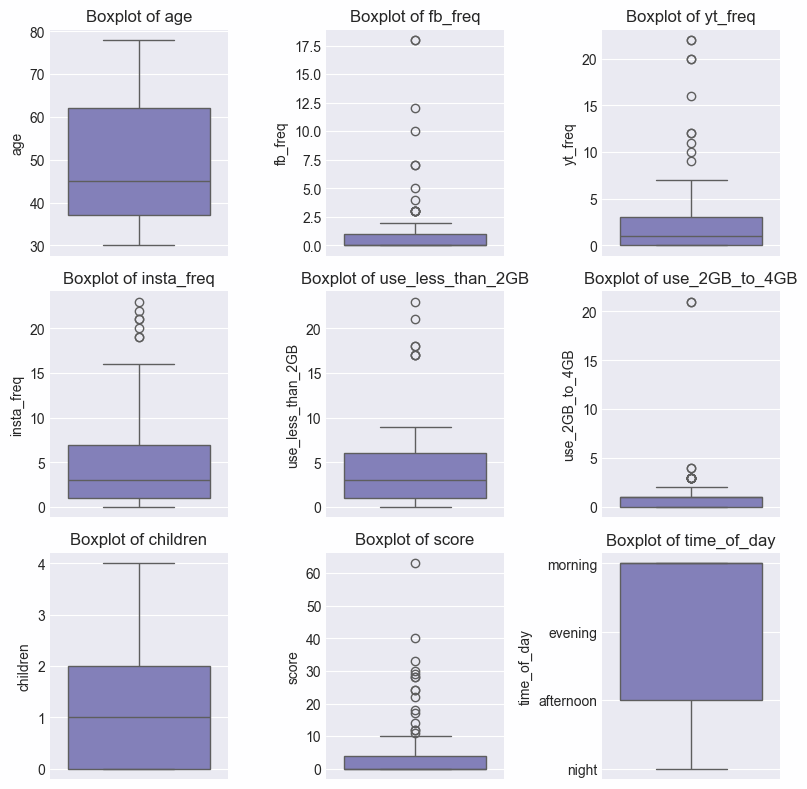

In [60]:
categorical_columns = ['gender', 'education', 'profession', 'income_level', 'continent', 'marital_status', 'purpose', 'go_with', 'weather', 'viettel_no_0', 'viettel_no_1', 'viettel_no_2', 'direction', 'datasilver', 'datagold', 'socialmedia', 'socialmediagold', 'datacall', 'datasilver_cr', 'socialmediagold_cr', 'socialmedia_cr', 'datacall_cr', 'datagold_cr']

continuous_columns = df.drop(axis=1, columns=categorical_columns).columns

# Create a canvas with 4 columns and 4 rows
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Draw boxplot on the canvas
for i, ax in enumerate(axes.flatten()):
    if i < len(continuous_columns):
        sns.boxplot(y=continuous_columns[i], data=df, ax=ax)
        ax.set_title(f'Boxplot of {continuous_columns[i]}')
        ax.set_ylabel(continuous_columns[i])
    else:
        ax.axis('off')

# Fit layout
plt.tight_layout()

plt.show()

In [61]:
# for x in continuous_columns:
#   range = 3
#   Q1 = df[x].quantile(0.25)
#   Q3 = df[x].quantile(0.75)
#   IQR = Q3 - Q1
#   lower_bound = Q1 - range * IQR
#   upper_bound = Q3 + range * IQR

#   df = df[(df[x] >= lower_bound) & (df[x] <= upper_bound)]

#   plt.show()

---


# input


In [62]:
labels = ['datasilver', 'datagold', 'socialmedia', 'socialmediagold', 'datacall']

---
